<a href="https://colab.research.google.com/github/eunicedai/ChineseAI/blob/master/test5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://repo.anaconda.com/archive/Anaconda3-5.2.0-Linux-x86_64.sh && bash Anaconda3-5.2.0-Linux-x86_64.sh -bfp /usr/local

In [0]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#### **Step 1:**<br>
 **Data explore and Data processing**

In [0]:
test_df = pd.read_csv('gdrive/Shared drives/ISE529/NY taxi/data/test.csv', parse_dates = ['pickup_datetime'])

In [0]:
train_df = pd.read_csv('gdrive/Shared drives/ISE529/NY taxi/data/train.csv', 
                       nrows = 5_000_000, parse_dates = ['pickup_datetime']).drop(columns = 'key')

In [0]:
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [0]:
test_df.dtypes

key                               object
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [0]:
train_df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [0]:
corr = train_df.corr()
corr.style.background_gradient().set_precision(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1,0.0086,-0.0067,0.0093,-0.0067,0.013
pickup_longitude,0.0086,1,-0.55,0.71,-0.51,0.00095
pickup_latitude,-0.0067,-0.55,1,-0.56,0.55,-0.0018
dropoff_longitude,0.0093,0.71,-0.56,1,-0.47,0.00011
dropoff_latitude,-0.0067,-0.51,0.55,-0.47,1,-0.0015
passenger_count,0.013,0.00095,-0.0018,0.00011,-0.0015,1


In [0]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.134080e+01,-7.250678e+01,3.991974e+01,-7.250652e+01,3.991725e+01,1.684695e+00
std,9.820175e+00,1.280970e+01,8.963509e+00,1.284777e+01,9.486767e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310364e+03,3.457622e+03,3.345917e+03,2.080000e+02


1. The minimum fare amount should not be < 0.
2. Minimum and Maximum longitude and latitude look not in New York City.
3. Minimum passenger count should not have 0.

Solution: 
1. After google, taxi fare initial charge in new york is $2.5, so we are removing fare amount smaller than this amount.
2. Remove 0 passenger count.
3. New York city longitudes are around (-74.5 ~ -72.8) and latitudes are around (40.5 ~ 41.8)

In [0]:
train_taxi = train_df[((train_df['pickup_longitude'] > -74.5) & (train_df['pickup_longitude'] < -72.8)) & 
                ((train_df['dropoff_longitude'] > -74.5) & (train_df['dropoff_longitude'] < -72.8)) & 
                ((train_df['pickup_latitude'] > 40.5) & (train_df['pickup_latitude'] < 41.8)) & 
                ((train_df['dropoff_latitude'] > 40.5) & (train_df['dropoff_latitude'] < 41.8)) & 
                (train_df['passenger_count'] > 0) & (train_df['fare_amount'] >= 2.5)]

In [0]:
train_taxi.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.876330e+06,4.876330e+06,4.876330e+06,4.876330e+06,4.876330e+06,4.876330e+06
mean,1.132928e+01,-7.397514e+01,4.075108e+01,-7.397429e+01,4.075146e+01,1.690526e+00
std,9.698604e+00,3.853421e-02,2.957983e-02,3.767663e-02,3.277582e-02,1.314041e+00
min,2.500000e+00,-7.449650e+01,4.050005e+01,-7.449991e+01,4.050005e+01,1.000000e+00
25%,6.000000e+00,-7.399227e+01,4.073655e+01,-7.399158e+01,4.073560e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075335e+01,-7.398061e+01,4.075386e+01,1.000000e+00
75%,1.250000e+01,-7.396833e+01,4.076754e+01,-7.396535e+01,4.076841e+01,2.000000e+00
max,9.520000e+02,-7.281258e+01,4.169685e+01,-7.281783e+01,4.171463e+01,2.080000e+02


**Passenger count:**

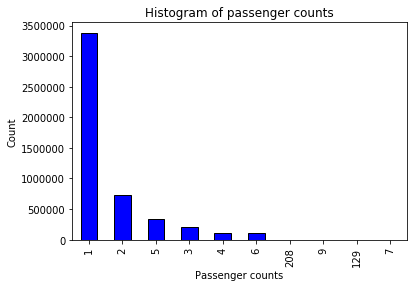

In [0]:
train_taxi['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Histogram of passenger counts'); 
plt.xlabel('Passenger counts'); 
plt.ylabel('Count');

Solution:
1. From the graph we can tell that the max passenger count is 6, so remove the passenger > 6.

In [0]:
taxi2 = train_taxi.loc[train_taxi['passenger_count'] <= 6]

**Set Data_time:**

In [0]:
taxi2['year'] = taxi2.pickup_datetime.dt.year
taxi2['month'] = taxi2.pickup_datetime.dt.month
taxi2['day'] = taxi2.pickup_datetime.dt.day
taxi2['weekday'] = taxi2.pickup_datetime.dt.weekday
taxi2['hour'] = taxi2.pickup_datetime.dt.hour

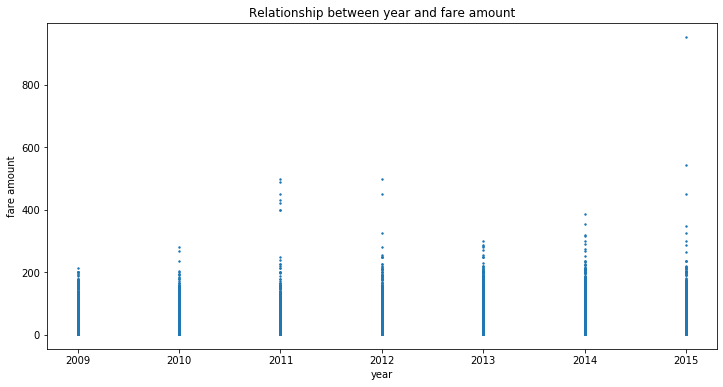

In [0]:
#year
plt.figure(figsize=(12,6))
plt.scatter(taxi2['year'],taxi2['fare_amount'],s=2)
plt.title('Relationship between year and fare amount')
plt.xlabel('year')
plt.ylabel('fare amount')
plt.show()

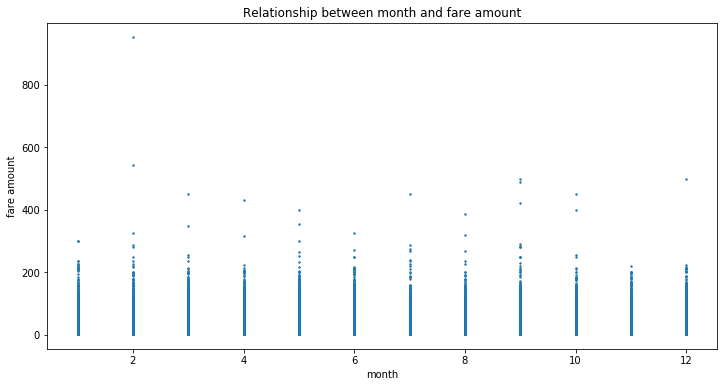

In [0]:
#month
plt.figure(figsize=(12,6))
plt.scatter(taxi2['month'],taxi2['fare_amount'],s=2)
plt.title('Relationship between month and fare amount')
plt.xlabel('month')
plt.ylabel('fare amount')
plt.show()

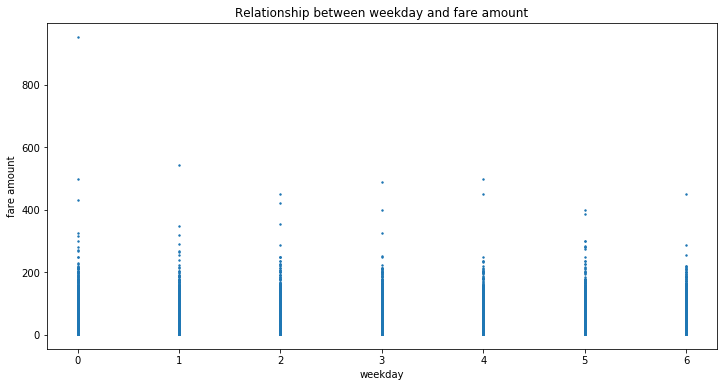

In [0]:
#weekday
plt.figure(figsize=(12,6))
plt.scatter(taxi2['weekday'],taxi2['fare_amount'],s=2)
plt.title('Relationship between weekday and fare amount')
plt.xlabel('weekday')
plt.ylabel('fare amount')
plt.show()

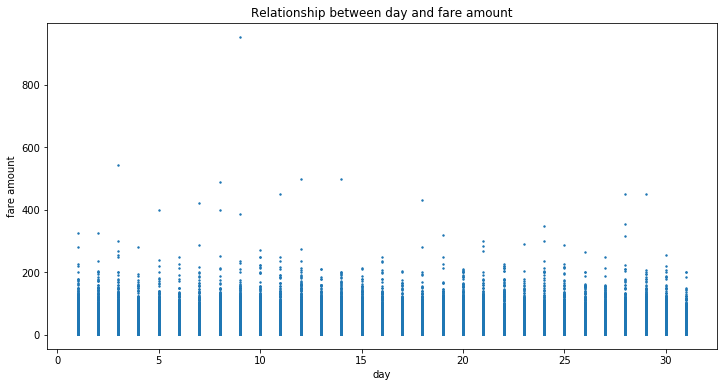

In [0]:
#day
plt.figure(figsize=(12,6))
plt.scatter(taxi2['day'],taxi2['fare_amount'],s=2)
plt.title('Relationship between day and fare amount')
plt.xlabel('day')
plt.ylabel('fare amount')
plt.show()

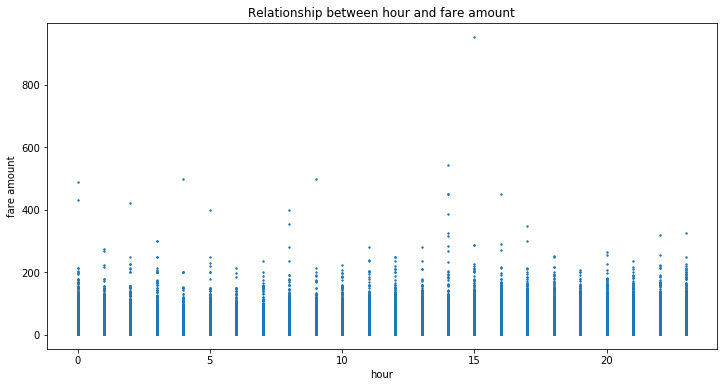

In [0]:
#hour
plt.figure(figsize=(12,6))
plt.scatter(taxi2['hour'],taxi2['fare_amount'],s=2)
plt.title('Relationship between hour and fare amount')
plt.xlabel('hour')
plt.ylabel('fare amount')
plt.show()

In [0]:
aa = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

aa_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [0]:
def plot_map(df, aa, nyc_map, s=10, alpha=0.2):
    fig, (ax1,ax2) = plt.subplots(1, 2)
    ax1.scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    ax1.set_xlim((aa[0], aa[1]))
    ax1.set_ylim((aa[2], aa[3]))
    ax1.set_title('Pickup locations')
    ax1.imshow(nyc_map, zorder=0, extent=aa)
    ax2.scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    ax2.set_xlim((aa[0], aa[1]))
    ax2.set_ylim((aa[2], aa[3]))
    ax2.set_title('Dropoff locations')
    ax2.imshow(nyc_map, zorder=0, extent=aa)


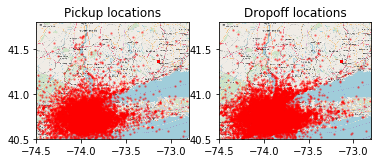

In [0]:

plot_map(taxi2,aa,nyc_map,s=2,alpha=0.4)


In [0]:
del taxi2['pickup_datetime']

In [0]:
taxi2.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
weekday              0
hour                 0
dtype: int64

#### **Step 2:**<br>
 **Add new features**

**1. distance:**<br> 
Getting distance between two points based on latitude and longitude using haversine formula.
https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836

In [0]:
from math import radians, cos, sin, asin, sqrt

In [0]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # 6371 is Radius of earth in kilometers. Use 3956 for miles
    return km

taxi2['distance'] = haversine(taxi2['pickup_latitude'], taxi2['pickup_longitude'], taxi2['dropoff_latitude'] , taxi2['dropoff_longitude'])

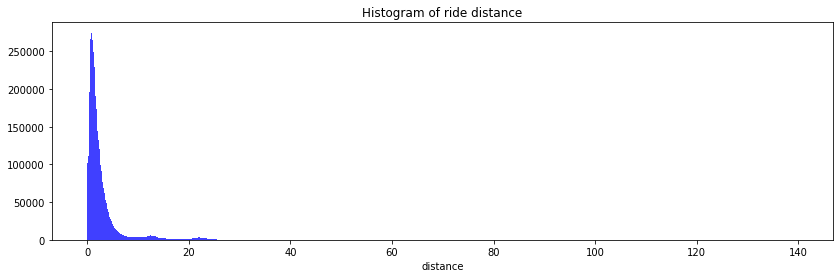

In [0]:
plt.figure(figsize = (14, 4))
n, bins, patches = plt.hist(taxi2.distance, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('distance')
plt.title('Histogram of ride distance')
plt.show();

In [0]:
taxi2['distance'].describe()

count    4.876324e+06
mean     2.705057e+00
std      3.930991e+00
min      0.000000e+00
25%      8.530633e-01
50%      1.551455e+00
75%      2.829630e+00
max      1.399139e+02
Name: distance, dtype: float64

In [0]:
taxi2.groupby(['passenger_count'])['distance','fare_amount'].mean()

,distance,fare_amount
passenger_count,,
1,2.659048,11.189439
2,2.880164,11.802383
3,2.741211,11.553098
4,2.776115,11.761346
5,2.716048,11.195626
6,2.802337,12.142420


In [0]:
#average usd per mile
ave=taxi2.fare_amount.sum()/taxi2.distance.sum()
ave

4.188177604497326

Sol: Distance should not be 0, thus remove 0

In [0]:
taxi2 = taxi2.loc[taxi2['distance'] > 0]

**2. Hotspot coordinate:**<br>
distance from pickup or dropoff coordinates to JFK, EWR, LGA

In [0]:
jfk_coord = (40.639722, -73.778889)
ewr_coord = (40.6925, -74.168611)
lga_coord = (40.77725, -73.872611)

pickup_JFK = haversine(taxi2['pickup_latitude'], taxi2['pickup_longitude'], jfk_coord[0], jfk_coord[1]) 
dropoff_JFK = haversine(jfk_coord[0], jfk_coord[1], taxi2['dropoff_latitude'], taxi2['dropoff_longitude'])
pickup_EWR = haversine(taxi2['pickup_latitude'], taxi2['pickup_longitude'], ewr_coord[0], ewr_coord[1]) 
dropoff_EWR = haversine(ewr_coord[0], ewr_coord[1], taxi2['dropoff_latitude'], taxi2['dropoff_longitude'])
pickup_LGA = haversine(taxi2['pickup_latitude'], taxi2['pickup_longitude'], lga_coord[0], lga_coord[1]) 
dropoff_LGA = haversine(lga_coord[0], lga_coord[1], taxi2['dropoff_latitude'], taxi2['dropoff_longitude'])

taxi2['JFK_coord'] = pd.concat([pickup_JFK, dropoff_JFK], axis=1).min(axis=1)
taxi2['EWR_coord'] = pd.concat([pickup_EWR, dropoff_EWR], axis=1).min(axis=1)
taxi2['LGA_coord'] = pd.concat([pickup_LGA, dropoff_LGA], axis=1).min(axis=1)

In [0]:
taxi2.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance,JFK_coord,EWR_coord,LGA_coord
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,0.410442,7.328054,36.071321,3.590537
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,4.628504,22.710042,16.973908,11.860620
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.001022,22.975458,19.801877,12.255441
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,0.910440,23.334207,19.787780,12.806098
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.361021,20.261437,22.415150,9.347420


#### **Step 3:**<br>
 **Tune and Do model training**

In [0]:
from sklearn.model_selection import train_test_split
y = taxi2['fare_amount']
X = taxi2.drop(columns=['fare_amount'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
from sklearn.metrics import mean_squared_error

**Models**

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# machine learning

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


In [0]:
param_grid = [{'max_depth':[3, 4, 5,6,7,8]}]

In [0]:
grid_dt = GridSearchCV( DecisionTreeRegressor(random_state =1),param_grid,cv=10,return_train_score = True)
grid_dt.fit(X_train,y_train)
grid_dt.best_params_

{'max_depth': 8}

In [0]:
# Decision Tree
decision_tree = DecisionTreeRegressor(max_depth =8, random_state =1)
decision_tree.fit(X_train, y_train)
y_d = decision_tree.predict(X_test)
decision_tree_rmse = mean_squared_error(y_test, y_d) ** 0.5

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [0]:
decision_tree_rmse

4.401412475249888

In [0]:
param_grid = [{'max_depth':[3, 4, 5,6,7,8]}]

In [0]:
grid_rf = GridSearchCV(RandomForestRegressor(random_state=1),param_grid, return_train_score = True)
grid_rf.fit(X_train,y_train)
grid_rf.best_params_

{'max_depth': 8}

In [0]:
# Random Forest
random_forest = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=1)
random_forest.fit(X_train, y_train)
y_r= random_forest.predict(X_test)
random_forest_rmse = mean_squared_error(y_test, y_r) ** 0.5

In [0]:
random_forest_rmse

4.311196839238369

In [0]:
param_grid = [{'n_neighbors':[2,3,4]}]

In [0]:
grid_p = GridSearchCV(KNeighborsRegressor(),param_grid, return_train_score = True)
grid_p.fit(X_train,y_train)
grid_p.best_params_

{'n_neighbors': 5}

In [0]:
# KNN
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)
y_k= knn.predict(X_test)
knn_rmse = mean_squared_error(y_test, y_k) ** 0.5
knn_rmse


5.023844397500042

In [0]:
from xgboost import XGBRegressor

In [0]:
param_grid = [{'learning_rate':[0.001,0.01,0.1]}]

In [0]:
grid_xgb2 = GridSearchCV(XGBRegressor(),param_grid)
grid_xgb2.fit(X_train,y_train)
grid_xgb2.best_params_

[15:03:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:09:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:33:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:45:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'learning_rate': 0.1}

In [0]:
#xgbregressor
xgb = XGBRegressor(n_estimators = 100,learning_rate = 0.1,random_state=1)
xgb.fit(X_train,y_train)
y_xgb= xgb.predict(X_test)
xgb_rmse= mean_squared_error(y_test, y_xgb) ** 0.5
xgb_rmse

[16:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


4.082996940563017

In [0]:
# Light GBM
import lightgbm as lgb

params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE',
    }
train_set = lgb.Dataset(X_train, y_train, silent=True)
lb = lgb.train(params, train_set = train_set, num_boost_round=300)
y_pred = lb.predict(X_test, num_iteration = lb.best_iteration)
lgb_rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE: 3.622


RMSE comparison:
 KNN: 5.023; Random Forest: 4.311; XGB: 4.083; Decision Tree: 4.4014; Light GBM: 3.622

**Use Neural Network:**

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
from keras import backend
 
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [0]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=14, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[rmse])
    return model

In [0]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0, validation_split=0.25)

filepath="gdrive/Shared drives/ISE529/NY taxi/data/weights.t3m1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_rmse', save_best_only=True, mode='min', verbose=0)
callbacks_list = [checkpoint]

seed = 7
np.random.seed(seed)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X.values, y.values, cv=kfold, fit_params=dict(callbacks=callbacks_list))
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -27.65 (2.86) MSE


In [0]:
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE: 5.151


Try to standardize the features.

In [0]:
def baseline_model2():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=14, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[rmse])
    return model

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

seed = 7
filepath="gdrive/Shared drives/ISE529/NY taxi/data/weights.t3m2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_rmse', verbose=0, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model2, nb_epoch=100, batch_size=5, verbose=0, validation_split=0.25)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold, fit_params={'mlp__callbacks':callbacks_list})

print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -17.25 (0.88) MSE


Try to add layer of model.

In [0]:
def baseline_model3():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=14, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[rmse])
    return model

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

seed = 7

filepath="gdrive/Shared drives/ISE529/NY taxi/data/weights.t3m3.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_rmse', verbose=0, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model3, nb_epoch=100, batch_size=5, verbose=0, validation_split=0.25)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold, fit_params={'mlp__callbacks':callbacks_list})

print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Try to make expand width of model.

In [0]:
def baseline_model4():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=14, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[rmse])
    return model

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

seed = 7

filepath="gdrive/Shared drives/ISE529/NY taxi/data/weights.t3m4.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_rmse', verbose=0, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# evaluate model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model4, nb_epoch=100, batch_size=5, verbose=0, validation_split=0.25)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold, fit_params={'mlp__callbacks':callbacks_list})

print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -16.43 (0.74) MSE


#### **Step 4:**<br>
 **Process test data and make prediction**

In [0]:
test_df['year'] = test_df.pickup_datetime.dt.year
test_df['month'] = test_df.pickup_datetime.dt.month
test_df['day'] = test_df.pickup_datetime.dt.day
test_df['weekday'] = test_df.pickup_datetime.dt.weekday
test_df['hour'] = test_df.pickup_datetime.dt.hour

In [0]:
test_df['distance'] = haversine(test_df['pickup_latitude'], test_df['pickup_longitude'], test_df['dropoff_latitude'] , test_df['dropoff_longitude'])

In [0]:
pickup_JFK = haversine(test_df['pickup_latitude'], test_df['pickup_longitude'], jfk_coord[0], jfk_coord[1]) 
dropoff_JFK = haversine(jfk_coord[0], jfk_coord[1], test_df['dropoff_latitude'], test_df['dropoff_longitude'])
pickup_EWR = haversine(test_df['pickup_latitude'], test_df['pickup_longitude'], ewr_coord[0], ewr_coord[1]) 
dropoff_EWR = haversine(ewr_coord[0], ewr_coord[1], test_df['dropoff_latitude'], test_df['dropoff_longitude'])
pickup_LGA = haversine(test_df['pickup_latitude'], test_df['pickup_longitude'], lga_coord[0], lga_coord[1]) 
dropoff_LGA = haversine(lga_coord[0], lga_coord[1], test_df['dropoff_latitude'], test_df['dropoff_longitude'])

test_df['JFK_coord'] = pd.concat([pickup_JFK, dropoff_JFK], axis=1).min(axis=1)
test_df['EWR_coord'] = pd.concat([pickup_EWR, dropoff_EWR], axis=1).min(axis=1)
test_df['LGA_coord'] = pd.concat([pickup_LGA, dropoff_LGA], axis=1).min(axis=1)

In [0]:
del test_df['pickup_datetime']

In [0]:
test_df.head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance,JFK_coord,EWR_coord,LGA_coord
0,2015-01-27 13:08:24.0000002,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,1.090365,21.956664,20.872415,11.205981
1,2015-01-27 13:08:24.0000003,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,1.468609,23.255923,18.926196,12.828406
2,2011-10-08 11:53:44.0000002,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.355718,22.564526,20.769438,11.941115
3,2012-12-01 21:12:12.0000002,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.145748,22.836476,19.892758,12.073598
4,2012-12-01 21:12:12.0000003,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,2.864812,21.320741,20.082759,10.396657


In [0]:
def pred_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=14, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.load_weights("gdrive/Shared drives/ISE529/NY taxi/data/weights.t3m2.hdf5")
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[rmse])
    return model

In [0]:
p_estimators = []
p_estimators.append(('standardize', StandardScaler()))
p_estimators.append(('mlp', KerasRegressor(build_fn=pred_model)))
pipeline_p = Pipeline(p_estimators)

In [0]:
pipeline_p.fit(X, y)
y_pred = pipeline_p.predict(test_df.drop(columns=['key']))

Epoch 1/1
4824505/4824505 [==============================] - 219s 45us/step - loss: 15.8893 - rmse: 1.8418


In [0]:
y_pred = lb.predict(test_df.drop(columns=['key']), num_iteration = lb.best_iteration)

In [0]:
submission = pd.DataFrame({
    "key": test_df.key,
    "Fare_amount": y_pred
})

submission.to_csv('gdrive/Shared drives/ISE529/NY taxi/data/result/s2.csv', index=False)